In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from tensorflow.keras.preprocessing.image import load_img

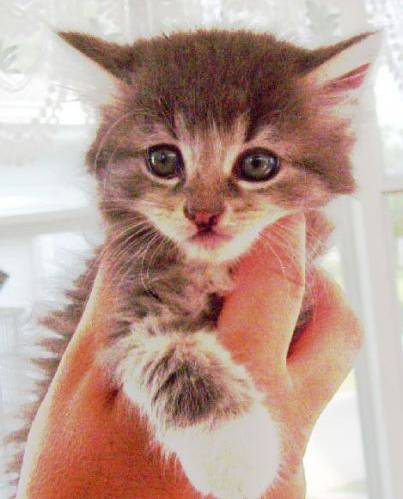

In [5]:
path = './train/cats'
name = 'cat.100.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [6]:
img = load_img(fullname, target_size=(299, 299))

In [7]:
x = np.array(img)
x.shape

(299, 299, 3)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input

In [35]:
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    './train',
    target_size=(150, 150),
    batch_size=20, 
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.


In [12]:
train_ds.class_indices

{'cats': 0, 'dogs': 1}

In [13]:
X, y = next(train_ds)

In [14]:
y[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [36]:
val_gen = ImageDataGenerator(rescale=1./255)

val_ds = val_gen.flow_from_directory(
    './validation',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 5000 images belonging to 2 classes.


In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [38]:
model = Sequential()

model.add(Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=('accuracy'))

### 2. Total number of parameters

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 175232)            0         
                                                                 
 dense_6 (Dense)             (None, 64)                11214912  
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
__________________________________________

In [40]:
history = model.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 31s 306ms/step - loss: 0.6958 - accuracy: 0.5290 - val_loss: 0.6930 - val_accuracy: 0.4940
Epoch 2/10
100/100 [==============================] - 31s 306ms/step - loss: 0.6929 - accuracy: 0.5235 - val_loss: 0.6914 - val_accuracy: 0.5400
Epoch 3/10
100/100 [==============================] - 30s 301ms/step - loss: 0.6907 - accuracy: 0.5210 - val_loss: 0.6894 - val_accuracy: 0.5190
Epoch 4/10
100/100 [==============================] - 31s 305ms/step - loss: 0.6862 - accuracy: 0.5505 - val_loss: 0.6810 - val_accuracy: 0.5820
Epoch 5/10
100/100 [==============================] - 30s 303ms/step - loss: 0.6831 - accuracy: 0.5530 - val_loss: 0.6823 - val_accuracy: 0.5440
Epoch 6/10
100/100 [==============================] - 30s 305ms/step - loss: 0.6792 - accuracy: 0.5615 - val_loss: 0.6698 - val_accuracy: 0.5920
Epoch 7/10
100/100 [==============================] - 30s 302ms/step - loss: 0.6707 - accuracy: 0.5960 - val_loss: 0.6650 - val_ac

### 3. Median of training accuracy

In [46]:
np.percentile(history.history['accuracy'], 50)

0.5572499930858612

### 4. Standard Deviation of training loss

In [47]:
np.std(history.history['loss'])

0.012490887213964226

## Data Augmentation

In [48]:
train_gen = ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')

train_ds = train_gen.flow_from_directory(
    './train',
    target_size=(150, 150),
    batch_size=20, 
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.


In [50]:
history = model.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 35s 345ms/step - loss: 0.6671 - accuracy: 0.5830 - val_loss: 0.6503 - val_accuracy: 0.6130
Epoch 2/10
100/100 [==============================] - 35s 344ms/step - loss: 0.6666 - accuracy: 0.5960 - val_loss: 0.6511 - val_accuracy: 0.5980
Epoch 3/10
100/100 [==============================] - 34s 343ms/step - loss: 0.6586 - accuracy: 0.6055 - val_loss: 0.6526 - val_accuracy: 0.6200
Epoch 4/10
100/100 [==============================] - 34s 342ms/step - loss: 0.6550 - accuracy: 0.6120 - val_loss: 0.6312 - val_accuracy: 0.6430
Epoch 5/10
100/100 [==============================] - 34s 343ms/step - loss: 0.6389 - accuracy: 0.6325 - val_loss: 0.6408 - val_accuracy: 0.6140
Epoch 6/10
100/100 [==============================] - 34s 339ms/step - loss: 0.6546 - accuracy: 0.6135 - val_loss: 0.6680 - val_accuracy: 0.5760
Epoch 7/10
100/100 [==============================] - 34s 337ms/step - loss: 0.6554 - accuracy: 0.6025 - val_loss: 0.6475 - val_ac

### 5. Mean for validation loss

In [51]:
np.mean(history.history['val_loss'])

0.6397215902805329

### 6. Avg validation accuracy for epochs 5-10

In [56]:
np.mean(history.history['val_accuracy'][-5:])

0.6301999926567078